# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies
from api_keys import (weather_api_key, g_key)

import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd

units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

output_data = "Output/weather_data.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

# Build partial query URL
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url

'http://api.openweathermap.org/data/2.5/weather?appid=e02ac5f08381e514f75f6cac9c496d6e&units=imperial&q='

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# set lists
city_list = []
lats = []
lngs = []
max_temps = []
humidities = []
cloudinesses = []
wind_speeds = []
countries = []
dates = []

# set initial count quantities for organization
count_number = 0
set_number = 1

# loops for creating dataframe columns
print("-----------------------------\nBeginning Data Retrieval\n-----------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        cloudinesses.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
    

        count_number += 1
        city_list.append(city)
        print(f"Processing Record {count_number} of Set {set_number} | {city}")
        
    except Exception:
        count_number = 0
        set_number += 1
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 1 of Set 2 | buarcos
Processing Record 2 of Set 2 | port blair
Processing Record 3 of Set 2 | christchurch
Processing Record 4 of Set 2 | cape town
Processing Record 5 of Set 2 | atuona
Processing Record 6 of Set 2 | puerto ayora
Processing Record 7 of Set 2 | hobart
Processing Record 8 of Set 2 | miles city
Processing Record 9 of Set 2 | sibolga
Processing Record 10 of Set 2 | busselton
Processing Record 11 of Set 2 | arraial do cabo
Processing Record 12 of Set 2 | severo-kurilsk
Processing Record 13 of Set 2 | rikitea
Processing Record 14 of Set 2 | sorland
Processing Record 15 of Set 2 | tuktoyaktuk
Processing Record 16 of Set 2 | iqaluit
Processing Record 17 of Set 2 | kapaa
Processing Record 18 of Set 2 | bambous virieux
Processing Record 19 of Set 2 | grindavik
Process

Processing Record 11 of Set 17 | zhigansk
Processing Record 12 of Set 17 | nagua
Processing Record 13 of Set 17 | tatawin
Processing Record 14 of Set 17 | akdepe
Processing Record 15 of Set 17 | pilar
Processing Record 16 of Set 17 | maniitsoq
Processing Record 17 of Set 17 | san carlos de bariloche
Processing Record 18 of Set 17 | lujan
Processing Record 19 of Set 17 | ginir
Processing Record 20 of Set 17 | kamina
Processing Record 21 of Set 17 | brae
Processing Record 22 of Set 17 | seoul
Processing Record 23 of Set 17 | cidreira
Processing Record 24 of Set 17 | maningrida
Processing Record 25 of Set 17 | zinapecuaro
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 20 | bhinga
Processing Record 2 of Set 20 | batagay
Processing Record 3 of Set 20 | marshall
Processing Record 4 of Set 20 | rovaniemi
Processing Record 5 of Set 20 | hasaki
Processing Record 6 of Set 20 | hithadhoo
Processing Record 7 of Set 20 | nelson bay
Pro

Processing Record 9 of Set 46 | bacungan
Processing Record 10 of Set 46 | kyra
Processing Record 11 of Set 46 | morant bay
Processing Record 12 of Set 46 | santa rosa
Processing Record 13 of Set 46 | pevek
City not found. Skipping...
Processing Record 1 of Set 47 | adelaide
Processing Record 2 of Set 47 | narsaq
Processing Record 3 of Set 47 | hovd
Processing Record 4 of Set 47 | clovis
Processing Record 5 of Set 47 | almeria
Processing Record 6 of Set 47 | paita
Processing Record 7 of Set 47 | chaumont
Processing Record 8 of Set 47 | kamaishi
Processing Record 9 of Set 47 | bonavista
Processing Record 10 of Set 47 | thomasville
City not found. Skipping...
Processing Record 1 of Set 48 | carnarvon
City not found. Skipping...
Processing Record 1 of Set 49 | port moresby
Processing Record 2 of Set 49 | kodiak
Processing Record 3 of Set 49 | codrington
Processing Record 4 of Set 49 | moose factory
Processing Record 5 of Set 49 | fairbanks
Processing Record 6 of Set 49 | tahta
City not fou

Processing Record 13 of Set 71 | dingle
Processing Record 14 of Set 71 | marsa matruh
Processing Record 15 of Set 71 | ilhabela
City not found. Skipping...
Processing Record 1 of Set 72 | tessalit
City not found. Skipping...
Processing Record 1 of Set 73 | kintampo
Processing Record 2 of Set 73 | pochutla
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# create a dictionary for df
weather_dict = {
    "City":city_list,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates,   
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.10,-79.24,48.99,100,90,5.82,US,1603248192
1,new norfolk,6.65,-10.59,72.59,98,65,1.61,LR,1603248194
2,buarcos,40.17,-8.88,60.01,93,40,5.82,PT,1603248195
3,port blair,-7.03,29.76,72.84,73,24,5.21,CD,1603248028
4,christchurch,-43.53,172.63,64.00,55,17,10.29,NZ,1603248017


In [31]:
#describe dataframe
result = weather_df.describe()
pd.DataFrame(result) 


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,22.630144,23.065235,59.908592,74.505415,51.949458,7.206841,1.603248e+09
std,31.478929,84.907755,19.905868,20.539931,39.287704,5.166414,1.498605e+02
min,-54.800000,-179.170000,3.200000,3.000000,0.000000,0.200000,1.603248e+09
25%,-0.902500,-51.710000,46.400000,64.000000,9.000000,3.310000,1.603248e+09
50%,25.815000,25.215000,63.920000,79.500000,50.500000,5.940000,1.603248e+09
75%,47.852500,97.437500,76.617500,91.000000,90.000000,9.687500,1.603248e+09
max,78.220000,179.320000,96.800000,100.000000,100.000000,30.380000,1.603249e+09


In [32]:
#output data
weather_df.to_csv(output_data)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#there is no city that have humidity > 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
#there is no city that have humidity > 100%

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#there is no city that have humidity > 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

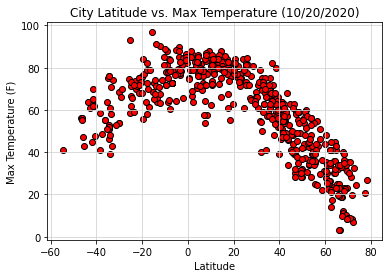

In [33]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Max Temperature (10/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Pictures/output1.png")
plt.show()

## Latitude vs. Humidity Plot

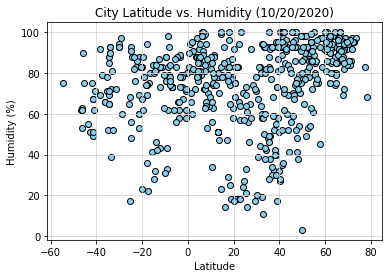

In [35]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (10/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Pictures/output2.png")
plt.show()

## Latitude vs. Cloudiness Plot

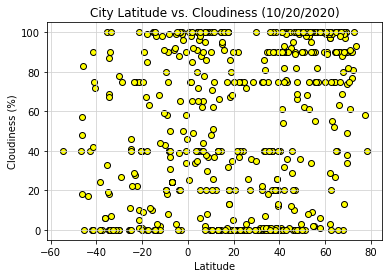

In [36]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="yellow")
plt.title("City Latitude vs. Cloudiness (10/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Pictures/output3.png")
plt.show()

## Latitude vs. Wind Speed Plot

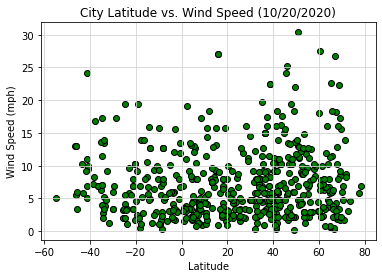

In [71]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Wind Speed (10/20/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Pictures/output4.png")
plt.show()

## Linear Regression

In [62]:
#split data to Northern and Southern
Northern_data = weather_df.loc[weather_df["Lat"] >= 0]
Southern_data = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and Latitude in Northern is -0.887


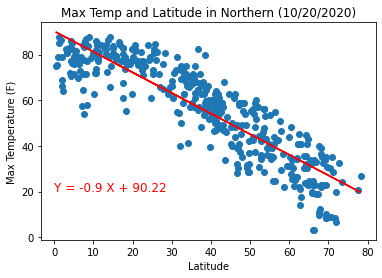

In [77]:
corr=stats.pearsonr(Northern_data['Lat'],Northern_data['Max Temp'])[0]

print(f"The correlation between Max Temp and Latitude in Northern is {round(corr,4)}")

model = stats.linregress(Northern_data['Lat'],Northern_data['Max Temp'])

y_values = Northern_data['Lat']*model[0]+model[1]
line_y= f"Y = {round(model[0], 2)} X + {round(model[1], 2)}"
plt.annotate(line_y,(0,20), color='red', fontsize=12)

plt.scatter(Northern_data['Lat'],Northern_data['Max Temp'])
plt.plot(Northern_data['Lat'],y_values,color="red")
plt.title("Max Temp and Latitude in Northern (10/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("Pictures/output5.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and Latitude in Southern is 0.7154


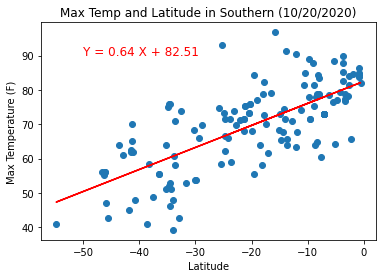

In [78]:
corr=stats.pearsonr(Southern_data['Lat'],Southern_data['Max Temp'])[0]

print(f"The correlation between Max Temp and Latitude in Southern is {round(corr,4)}")

model = stats.linregress(Southern_data['Lat'],Southern_data['Max Temp'])

y_values = Southern_data['Lat']*model[0]+model[1]
line_y= f"Y = {round(model[0], 2)} X + {round(model[1], 2)}"
plt.annotate(line_y,(-50,90), color='red', fontsize=12)

plt.scatter(Southern_data['Lat'],Southern_data['Max Temp'])
plt.plot(Southern_data['Lat'],y_values,color="red")
plt.title("Max Temp and Latitude in Southern (10/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig("Pictures/output6.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity and Latitude in Northern is 0.2445


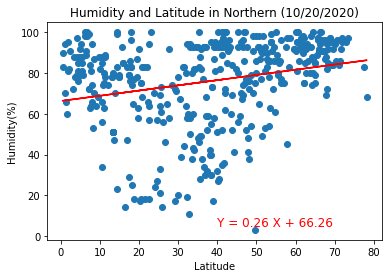

In [79]:
corr=stats.pearsonr(Northern_data['Lat'],Northern_data['Humidity'])[0]

print(f"The correlation between Humidity and Latitude in Northern is {round(corr,4)}")

model = stats.linregress(Northern_data['Lat'],Northern_data['Humidity'])

y_values = Northern_data['Lat']*model[0]+model[1]
line_y= f"Y = {round(model[0], 2)} X + {round(model[1], 2)}"
plt.annotate(line_y,(40,5), color='red', fontsize=12)

plt.scatter(Northern_data['Lat'],Northern_data['Humidity'])
plt.plot(Northern_data['Lat'],y_values,color="red")
plt.title("Humidity and Latitude in Northern (10/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig("Pictures/output7.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity and Latitude in Southern is 0.0512


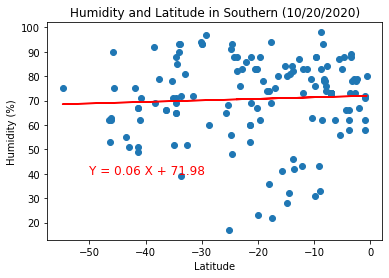

In [80]:
corr=stats.pearsonr(Southern_data['Lat'],Southern_data['Humidity'])[0]

print(f"The correlation between Humidity and Latitude in Southern is {round(corr,4)}")

model = stats.linregress(Southern_data['Lat'],Southern_data['Humidity'])

y_values = Southern_data['Lat']*model[0]+model[1]
line_y= f"Y = {round(model[0], 2)} X + {round(model[1], 2)}"
plt.annotate(line_y,(-50,40), color='red', fontsize=12)

plt.scatter(Southern_data['Lat'],Southern_data['Humidity'])
plt.plot(Southern_data['Lat'],y_values,color="red")
plt.title("Humidity and Latitude in Southern (10/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Pictures/output8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness and Latitude in Northern is 0.2451


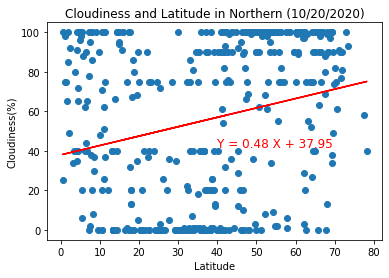

In [81]:
corr=stats.pearsonr(Northern_data['Lat'],Northern_data['Cloudiness'])[0]

print(f"The correlation between Cloudiness and Latitude in Northern is {round(corr,4)}")

model = stats.linregress(Northern_data['Lat'],Northern_data['Cloudiness'])

y_values = Northern_data['Lat']*model[0]+model[1]
line_y= f"Y = {round(model[0], 2)} X + {round(model[1], 2)}"
plt.annotate(line_y,(40,42), color='red', fontsize=12)

plt.scatter(Northern_data['Lat'],Northern_data['Cloudiness'])
plt.plot(Northern_data['Lat'],y_values,color="red")
plt.title("Cloudiness and Latitude in Northern (10/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("Pictures/output9.png")
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness and Latitude in Southern is 0.2051


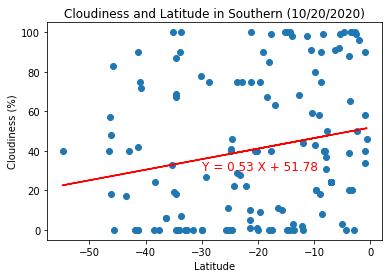

In [82]:
corr=stats.pearsonr(Southern_data['Lat'],Southern_data['Cloudiness'])[0]

print(f"The correlation between Cloudiness and Latitude in Southern is {round(corr,4)}")

model = stats.linregress(Southern_data['Lat'],Southern_data['Cloudiness'])

y_values = Southern_data['Lat']*model[0]+model[1]
line_y= f"Y = {round(model[0], 2)} X + {round(model[1], 2)}"
plt.annotate(line_y,(-30,30), color='red', fontsize=12)

plt.scatter(Southern_data['Lat'],Southern_data['Cloudiness'])
plt.plot(Southern_data['Lat'],y_values,color="red")
plt.title("Cloudiness and Latitude in Southern (10/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Pictures/output10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed and Latitude in Northern is 0.1184


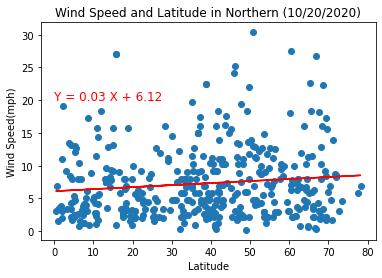

In [83]:
corr=stats.pearsonr(Northern_data['Lat'],Northern_data['Wind Speed'])[0]

print(f"The correlation between Wind Speed and Latitude in Northern is {round(corr,4)}")

model = stats.linregress(Northern_data['Lat'],Northern_data['Wind Speed'])

y_values = Northern_data['Lat']*model[0]+model[1]
line_y= f"Y = {round(model[0], 2)} X + {round(model[1], 2)}"
plt.annotate(line_y,(0,20), color='red', fontsize=12)

plt.scatter(Northern_data['Lat'],Northern_data['Wind Speed'])
plt.plot(Northern_data['Lat'],y_values,color="red")
plt.title("Wind Speed and Latitude in Northern (10/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("Pictures/output11.png")
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed and Latitude in Southern is -0.1789


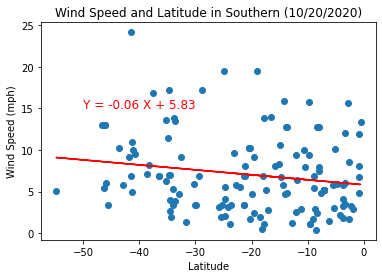

In [84]:
corr=stats.pearsonr(Southern_data['Lat'],Southern_data['Wind Speed'])[0]

print(f"The correlation between Wind Speed and Latitude in Southern is {round(corr,4)}")

model = stats.linregress(Southern_data['Lat'],Southern_data['Wind Speed'])

y_values = Southern_data['Lat']*model[0]+model[1]
line_y= f"Y = {round(model[0], 2)} X + {round(model[1], 2)}"
plt.annotate(line_y,(-50,15), color='red', fontsize=12)

plt.scatter(Southern_data['Lat'],Southern_data['Wind Speed'])
plt.plot(Southern_data['Lat'],y_values,color="red")
plt.title("Wind Speed and Latitude in Southern (10/20/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Pictures/output12.png")
plt.show()